<a href="https://colab.research.google.com/github/lovelessbhartal12/machine-learning-codebase/blob/main/Handling_mixed_dataipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/datasets_11657_16098_train.xls')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:

df_filtered = df[['Ticket', 'Cabin','Parch', 'Survived']]
df_filtered.head()


,Ticket,Cabin,Parch,Survived
0,A/5 21171,NaN,0,0
1,PC 17599,C85,0,1
2,STON/O2. 3101282,NaN,0,1
3,113803,C123,0,1
4,373450,NaN,0,0


In [9]:
df_filtered['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [13]:
df_filtered['cabin_num']=df_filtered['Cabin'].str.extract('(\d+)') # extract the numerical data form column and place in that new column
df_filtered['cabin_cat']=df_filtered['Cabin'].str[0]

/tmp/ipython-input-13-3841987988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cabin_num']=df_filtered['Cabin'].str.extract('(\d+)') # extract the numerical data form column and place in that new column
/tmp/ipython-input-13-3841987988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cabin_cat']=df_filtered['Cabin'].str[0]


In [14]:
df_filtered.head()

,Ticket,Cabin,Parch,Survived,cabin_num,cabin_cat
0,A/5 21171,NaN,0,0,NaN,NaN
1,PC 17599,C85,0,1,85,C
2,STON/O2. 3101282,NaN,0,1,NaN,NaN
3,113803,C123,0,1,123,C
4,373450,NaN,0,0,NaN,NaN


<Axes: xlabel='cabin_cat'>

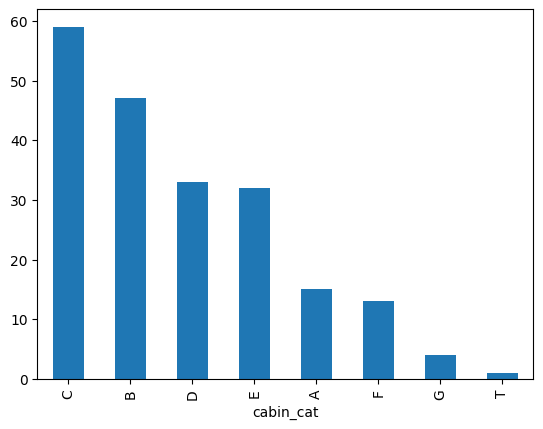

In [16]:
df_filtered['cabin_cat'].value_counts().plot(kind='bar')